In [1]:
%config Completer.use_jedi = False
import warnings

warnings.filterwarnings(action='ignore')

# 비지도 학습(Unsupervised Leanring)
지도 학습에서는 라벨링된 데이터를 이용해서 모델을 생성한다. 주어진 데이터셋에 라벨링이 되어 있다면 학습 및 분류를 시키기 좋지만 실제 데이터를 다루다 보면 라벨링이 되어 있지 않은 경우도 많이 접한다. 비지도 학습은 라벨링이 되어 있지 않은 데이터를 이용하는 학습 방법이다.

비지도 학습에 사용하는 데이터는 라벨링이 되어 있지 않으므로 타겟 데이터 없이 피쳐 데이터만을 활용해서 데이터를 학습시킨다. 지도 학습에서는 데이터를 분류하는 것을 분류(classification)라고 했지만, 비지도 학습에서는 군집(clustering)이라고 한다.

K-평균 클러스터링(K-means Clustering)
K-평균 클러스터링은 N개의 데이터를 K개의 클러스터로 나누는 클러스터링 기법이다. K-평균 클러스터링은 각 데이터 포인트와 각 그룹 평균 간의 거리를 구한 후 가장 가까운 클러스터로 배정하는 방법이다.

K-평균 클러스터링에서는 거리 개념이 사용된다. 여기서는 유클리드 거리(Euclidean distance)를 사용한다. 데이터 포인트 x와 데이터 포인트 y 사이의 유클리드 거리는 아래와 같은 공식을 사용한다.
$$d(x, y) = \sqrt {\sum {(x_i - y_i)^2}$$
K-평균 클러스터링 알고리즘
① 그룹 평균 초기화
   K-평균 클러스터링 알고리즘의 첫 과정은 각 그룹의 평균을 초기화하는 것인데, 이때 사용하는 가장 기본적인 방법은 랜럼으로 그룹의 평균을 설정하는 것이다.
② 그룹 할당
   각 데이터 포인트와 가장 가까운 그룹 평균에 해당되는 그룹에 할당한다. 즉, 각 데이터 포인트와 각 그룹의 평균까지의 거리를 계산해서 가장 가까운 그룹으로 속하게 하는 것이다.
③ 평균 업데이트
   위 단계를 거치면 모든 데이터 포인트가 어떤 그룹에 속하는지 구할 수 있다. 그 후 각 그룹에 대한 새로운 평균값 구한다.
④ 반복
   ② 단계에서 바뀌는게 없을 때 까지 ②, ③ 단계를 반복한다.

K-평균 클러스터링은 사용하기 쉽다는 장점이 있지만 K-평균 클러스터링에서는 가중치를 주지 않아 클러스터간 데이터의 밀도 차이가 있을 경우 클러스터링이 잘되지 않는 단점이 있다. 그리고 K-평균 클러스터링은 모양을 고려하지 않으며, 초기 K값을 사용자가 정해야 한다는 단점이 존재한다.

K-평균 클러스터링 알고리즘을 활용해 주어진 데이터를 클러스터링해 본다.

In [2]:
# 데이터 불러오기
# make_blobs 함수는 등방성 가우시안 정규 분포를 이용해 가상 데이터를 생성한다.
# 등방성이라는 말은 모든 방향으로 같은 성질을 가진다는 뜻이다.
from sklearn.datasets import make_blobs  # 클러스터링용 가상 데이터를 사용하기 위해 import 한다.

# n_samples 옵션으로 표본 데이터의 개수(100이 기본값), n_features 옵션으로 피쳐(독립변수)의 개수, centers 옵션으로
# 생성할 클러스터의 개수 혹은 중심을 설정하고 클러스터링용 가상 데이터를 만든다.
X, y = make_blobs(n_samples=100, n_features=2, centers=6, random_state=10)
# 생성된 데이터 차원 확인
X.shape, y.shape

((100, 2), (100,))

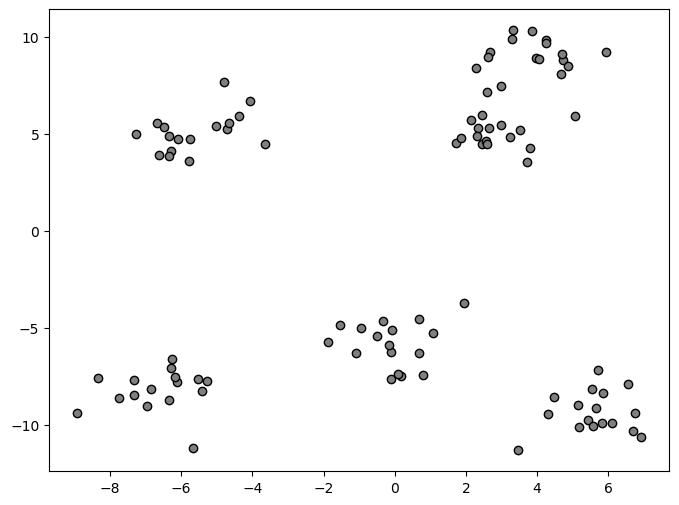

In [3]:
# 라벨링되지 않은 데이터 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=[8, 6])
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='black', marker='o')
plt.show()

K-평균 군집화
K-평균 군집화 방법은 가장 단순하고 빠른 군집화 방법의 하나로 목적 함수 값이 최소화될 때까지 군집의 중심 위치와 각 체이터가 소속될 군집을 반복해서 찾는다.

In [4]:
# K-평균 클러스터링
from sklearn.cluster import KMeans  # K-평균 클러스터링에 사용하기 위해 import 한다.

# n_clusters 옵션으로 클러스터링하려는 집단의 수, init 옵션으로 첫 번째 평균값을 어떻게 정할지, max_iter 옵션으로
# 최대 반복 횟수를 설정해 K-평균 클러스터링 객체를 만든다.
kmc = KMeans(n_clusters=5, init='random', max_iter=100, random_state=0)  # KMeans 객체를 만든다.
kmc.fit(X)  # KMeans 모델을 학습시킨다.
label_kmc = kmc.labels_  # labels_ 속성으로 데이터를 어떻게 클러스터링했는지 확인할 수 있다.
label_kmc

array([2, 3, 4, 4, 0, 4, 1, 1, 0, 2, 3, 4, 0, 2, 0, 4, 3, 1, 0, 1, 1, 4,
       2, 4, 4, 4, 2, 3, 0, 1, 1, 2, 2, 0, 2, 2, 3, 3, 2, 3, 1, 1, 3, 1,
       0, 3, 3, 2, 0, 3, 0, 3, 0, 2, 3, 0, 0, 2, 3, 1, 4, 3, 3, 1, 2, 4,
       3, 3, 3, 0, 3, 3, 4, 1, 0, 4, 2, 2, 3, 1, 2, 4, 4, 0, 0, 3, 1, 3,
       3, 1, 3, 1, 3, 3, 3, 4, 3, 3, 3, 3], dtype=int32)

In [5]:
# KMeans 클러스터링 적용 후 데이터를 데이터프레임으로 만든다.
import pandas as pd  # 데이터프레임 형태로 만들기 위해서 판다스 라이브러리를 import 한다.

kmc_columns = ['kmc_comp1', 'kmc_comp2']  # 데이터프레임의 열 이름을 정한다.
X_kmc_df = pd.DataFrame(X, columns=kmc_columns)  # KMeans 클러스터링된 데이터를 데이터프레임으로 만든다.
X_kmc_df['target'] = y  # 데이터프레임에 타겟 데이터를 결합한다.
X_kmc_df['label_kmc'] = label_kmc  # 데이터프레임에 클러스터링한 라벨을 결합한다.
X_kmc_df

,kmc_comp1,kmc_comp2,target,label_kmc
0,-6.086784,4.729827,3,2
1,3.801750,4.278268,1,3
2,-7.330583,-8.494063,4,4
3,-6.107069,-7.818906,4,4
4,5.525562,-8.186965,0,0
...,...,...,...,...
95,-6.950884,-9.024594,4,4
96,2.591843,4.446782,1,3
97,2.992321,5.436981,1,3
98,2.310466,4.854172,1,3


In [6]:
# 타겟 클래스, 클러스터링 라벨 종류 확인
set(X_kmc_df['target']), set(X_kmc_df['label_kmc'])

({0, 1, 2, 3, 4, 5}, {0, 1, 2, 3, 4})

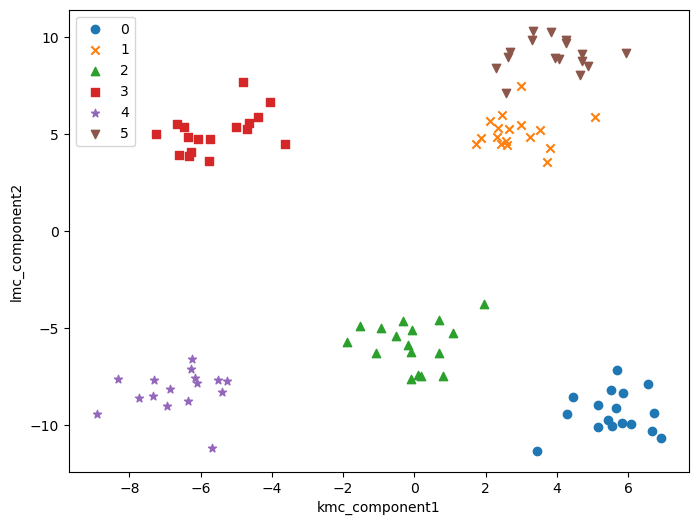

In [7]:
# 실제 타겟 데이터 시각화
df = X_kmc_df
markers = ['o', 'x', '^', 's', '*', 'v']  # 시각화에 사용할 마커를 지정한다.
plt.figure(figsize=[8, 6])

# enumerate() 함수는 (인덱스, 데이터) 형태의 튜플을 리턴한다.
for index, marker in enumerate(markers):
    df_index = df[df['target'] == index]  # i번째 실제 데이터에 해당되는 데이터만 추출한다.
    target_index = index  # 타겟 이름을 얻어온다.
    X1 = df_index['kmc_comp1']  # 실제 타겟 데이터의 첫 번째 벡터를 얻어온다.
    X2 = df_index['kmc_comp2']  # 실제 타겟 데이터의 두 번째 벡터를 얻어온다.
    plt.scatter(X1, X2, marker=marker, label=target_index)  # 산포도를 그린다.
# =====

plt.xlabel('kmc_component1')
plt.ylabel('lmc_component2')
plt.legend()
plt.show()

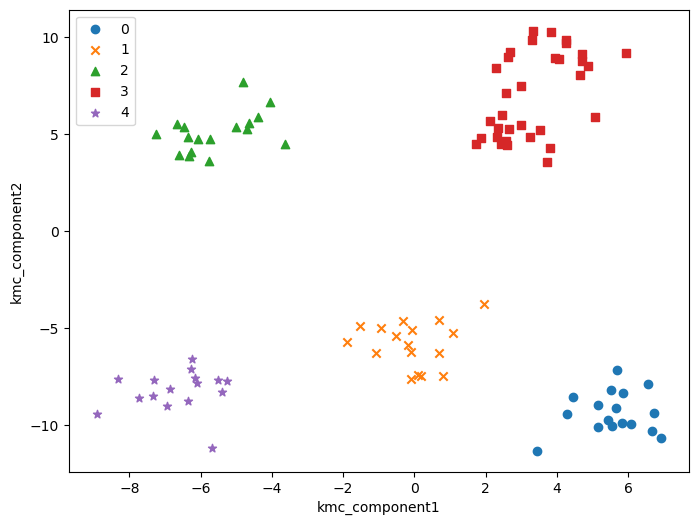

In [8]:
# KMeans 클러스터링 적용 데이터 시각화
df = X_kmc_df
markers = ['o', 'x', '^', 's', '*']  # 시각화에 사용할 마커를 지정한다.
plt.figure(figsize=[8, 6])

# enumerate() 함수는 (인덱스, 데이터) 형태의 튜플을 리턴한다.
for index, marker in enumerate(markers):
    # KMeans 클러스터링으로 라벨링한 데이터 중 i번째 클러스터에 해당되는 데이터만 추출한다.
    df_index = df[df['label_kmc'] == index]
    target_index = index  # 타겟 이름을 얻어온다.
    X1 = df_index['kmc_comp1']  # KMeans 클러스터링된 데이터의 첫 번째 벡터를 얻어온다.
    X2 = df_index['kmc_comp2']  # KMeans 클러스터링된 데이터의 두 번째 벡터를 얻어온다.
    plt.scatter(X1, X2, marker=marker, label=target_index)  # 산포도를 그린다.
# =====

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

In [9]:
# 모형 평가
from sklearn.metrics import silhouette_score  # KMeans 클러스터링을 통해 만들어진 모형 평가를 위해 import 한다.

# silhouette_score() 함수의 인수로 실제 피쳐값 X와 라벨링값 label_kmc을 넘겨 실루엣 스코어를 평가한다.
sil_score = silhouette_score(X, label_kmc)
sil_score

0.7209801012404233